# Pacotes

In [1]:
import pandas as pd
import numpy as np
import shapefile as shp  # Requires the pyshp package
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from math import sin, cos, sqrt, atan2, radians
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

# Funções

In [2]:
###############[longitude, latitude, altitude]############################
arcoverde_pe = [-37.08, -8.41, 680.7] #reverificado
cabrobo_pe = [-39.33, -8.51, 341.46] #reverificado
garanhuns_pe = [-36.51, -8.88, 822.76] #reverificado
oricuri_pe = [-40.04, -7.9, 459.28] #reverificado
petrolina_pe = [-40.46, -9.36, 370.46] #reverificado
recife_pe = [-34.95, -8.05, 10] #reverificado
surubim_pe = [-35.71, -7.83, 418.32] #reverificado
triunfo_pe = [-38.11, -7.81, 1105] #reverificado

dic_cities_pe = {'df_arcoverde_pe':arcoverde_pe, 'df_cabrobo_pe':cabrobo_pe, 'df_garanhuns_pe': garanhuns_pe,
                 'df_oricuri_pe':oricuri_pe, 'df_petrolina_pe':petrolina_pe,'df_recife_pe':recife_pe,
                 'df_surubim_pe':surubim_pe, 'df_triunfo_pe':triunfo_pe}

def get_most_proximal_city(a, dict_cities_pe = dic_cities_pe):
    '''
    a is a list of latitude and longitude
    dict_cities_pe is the dictionary of cities
    '''
    list_cities_distance = []
    def get_distance(a,b):
        
        # approximate radius of earth in km
        R = 6373.0

        lat1 = radians(a[1])
        lon1 = radians(a[0])
        lat2 = radians(b[1])
        lon2 = radians(b[0])

        dlon = lon2 - lon1
        dlat = lat2 - lat1

        a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))

        distance = R * c

        return distance
    
    for i in dic_cities_pe.keys():
        list_cities_distance.append([i, get_distance(np.array(a), np.array(dic_cities_pe[i][0:2]))])
        
    list_cities_distance.sort(key = lambda x: x[1])
    
    return list_cities_distance[0][0]

def get_annual_mean_from_clima_data(df_in, column):
    
    for i in range(0,len(df_in)):
        prox_city = get_most_proximal_city(df_in.iloc[i,0:2].values)
        mean_annual = 0
        
        if prox_city == 'df_arcoverde_pe':
            mean_annual = df_arcoverde_pe[column].mean()
            
        elif prox_city == 'df_cabrobo_pe':
            mean_annual = df_cabrobo_pe[column].mean()
            
        elif prox_city == 'df_garanhuns_pe':
            mean_annual = df_garanhuns_pe[column].mean()
            
        elif prox_city == 'df_oricuri_pe':
            mean_annual = df_oricuri_pe[column].mean()
            
        elif prox_city == 'df_petrolina_pe':
            mean_annual = df_petrolina_pe[column].mean()
            
        elif prox_city == 'df_recife_pe':
            mean_annual = df_recife_pe[column].mean()

        elif prox_city == 'df_surubim_pe':
            mean_annual = df_surubim_pe[column].mean()

        elif prox_city == 'df_triunfo_pe':
            mean_annual = df_triunfo_pe[column].mean()

        df_in.iloc[i,2] = mean_annual
        
    return df_in

get_most_proximal_city(np.array([-35.7, -7.8]))

'df_surubim_pe'

# Upando Bancos

## LABREN

In [3]:
df_diffuse = pd.read_csv('radiacao_PE/diffuse_means_PE.csv', sep=';')
df_diffuse.head()

ID          UF     LON     LAT  ANNUAL   JAN   FEB   MAR   APR   MAY  \
0  35974  Pernambuco -40.749 -9.5005    2047  2235  2365  2250  2087  1845   
1  35975  Pernambuco -40.649 -9.5005    2060  2277  2378  2253  2107  1863   
2  35976  Pernambuco -40.549 -9.5005    2079  2245  2394  2283  2107  1889   
3  36352  Pernambuco -40.749 -9.4005    2046  2251  2377  2256  2082  1848   
4  36353  Pernambuco -40.649 -9.4005    2038  2262  2365  2264  2095  1866   

    JUN   JUL   AUG   SEP   OCT   NOV   DEC  
0  1685  1721  1855  1970  2090  2137  2323  
1  1699  1741  1878  1965  2081  2139  2335  
2  1732  1768  1906  1974  2107  2214  2324  
3  1678  1722  1873  1962  2069  2138  2297  
4  1695  1730  1859  1894  2032  2122  2278

In [4]:
df_direct_normal = pd.read_csv('radiacao_PE/direct_normal_means_PE.csv', sep=';')
df_direct_normal.head()

ID          UF     LON     LAT  ANNUAL   JAN   FEB   MAR   APR   MAY  \
0  35974  Pernambuco -40.749 -9.5005    5668  6173  5241  5408  4725  5075   
1  35975  Pernambuco -40.649 -9.5005    5582  6040  5233  5380  4647  4964   
2  35976  Pernambuco -40.549 -9.5005    5468  6056  5171  5296  4613  4788   
3  36352  Pernambuco -40.749 -9.4005    5683  6128  5244  5397  4791  5068   
4  36353  Pernambuco -40.649 -9.4005    5652  6121  5262  5368  4700  4921   

    JUN   JUL   AUG   SEP   OCT   NOV   DEC  
0  5211  5495  6061  6321  5986  6396  5923  
1  5054  5346  5877  6315  5978  6300  5851  
2  4835  5082  5744  6248  5879  6082  5821  
3  5230  5535  5954  6348  6058  6434  6004  
4  5065  5351  5903  6534  6134  6437  6029

In [5]:
df_foto_active = pd.read_csv('radiacao_PE/foto_ativa_means_PE.csv', sep=';')
df_foto_active.head()

ID          UF     LON     LAT  ANNUAL   JAN   FEB   MAR   APR   MAY  \
0  35974  Pernambuco -40.749 -9.5005    5834  6026  5892  6019  5454  5296   
1  35975  Pernambuco -40.649 -9.5005    5787  5972  5890  5991  5419  5232   
2  35976  Pernambuco -40.549 -9.5005    5740  5966  5872  5975  5391  5148   
3  36352  Pernambuco -40.749 -9.4005    5833  6025  5891  6015  5464  5286   
4  36353  Pernambuco -40.649 -9.4005    5809  6011  5888  5987  5428  5204   

    JUN   JUL   AUG   SEP   OCT   NOV   DEC  
0  5130  5383  5988  6417  6271  6230  5904  
1  5033  5294  5887  6401  6253  6192  5872  
2  4950  5175  5832  6367  6201  6144  5861  
3  5126  5390  5939  6417  6286  6227  5927  
4  5054  5285  5895  6473  6318  6229  5933

In [6]:
df_global_horizontal = pd.read_csv('radiacao_PE/global_horizontal_means_PE.csv', sep=';')
df_global_horizontal.head()

ID          UF     LON     LAT  ANNUAL   JAN   FEB   MAR   APR   MAY  \
0  35974  Pernambuco -40.749 -9.5005    5811  6408  6089  6010  5246  4944   
1  35975  Pernambuco -40.649 -9.5005    5766  6347  6088  5983  5213  4887   
2  35976  Pernambuco -40.549 -9.5005    5722  6339  6068  5967  5187  4811   
3  36352  Pernambuco -40.749 -9.4005    5813  6402  6089  6006  5258  4940   
4  36353  Pernambuco -40.649 -9.4005    5790  6384  6085  5980  5225  4865   

    JUN   JUL   AUG   SEP   OCT   NOV   DEC  
0  4709  4979  5681  6334  6425  6581  6333  
1  4624  4900  5587  6318  6408  6540  6296  
2  4553  4795  5537  6284  6353  6488  6283  
3  4712  4990  5640  6336  6442  6578  6357  
4  4648  4896  5598  6389  6473  6578  6362

In [7]:
df_plano_inclinado = pd.read_csv('radiacao_PE/plano_enclinado_means_PE.csv', sep=';')
df_plano_inclinado.head()

ID          UF     LON     LAT  ANNUAL   JAN   FEB   MAR   APR   MAY  \
0  35974  Pernambuco -40.749 -9.5005    2454  2645  2551  2549  2386  2185   
1  35975  Pernambuco -40.649 -9.5005    2439  2623  2549  2541  2377  2169   
2  35976  Pernambuco -40.549 -9.5005    2418  2610  2540  2528  2363  2142   
3  36352  Pernambuco -40.749 -9.4005    2457  2646  2559  2550  2388  2193   
4  36353  Pernambuco -40.649 -9.4005    2450  2637  2555  2541  2383  2167   

    JUN   JUL   AUG   SEP   OCT   NOV   DEC  
0  2073  2149  2388  2613  2690  2690  2524  
1  2047  2121  2357  2610  2689  2673  2509  
2  2017  2071  2331  2595  2669  2639  2505  
3  2074  2150  2371  2618  2703  2694  2543  
4  2050  2117  2359  2643  2717  2685  2543

## INMET

In [8]:
df_cabrobo_pe = pd.read_csv('clima_PE/cabrobo_1999_2015.txt', sep=';')
df_cabrobo_pe.drop(columns=['Unnamed: 16'], inplace=True)
df_cabrobo_pe['Altitude'] = np.ones(len(df_cabrobo_pe))*dic_cities_pe['df_cabrobo_pe'][2]
df_cabrobo_pe.head()

Estacao        Data  Hora  VelocidadeVentoMedia  \
0    82886  31/01/1999     0              3.244565   
1    82886  28/02/1999     0              3.802410   
2    82886  31/03/1999     0              3.041935   
3    82886  30/04/1999     0              4.040000   
4    82886  31/05/1999     0              4.216129   

   VelocidadeVentoMaximaMedia  EvapoBHPotencial  InsolacaoTotal  \
0                         6.0               NaN          223.16   
1                         7.8               NaN          214.60   
2                         8.0               NaN          207.40   
3                         7.5               NaN          260.40   
4                         9.5               NaN          234.80   

   NebulosidadeMedia  NumDiasPrecipitacao  PrecipitacaoTotal  PressaoMedia  \
0           6.741935                  4.0               16.2    969.462366   
1           7.107143                  3.0                9.3    970.285714   
2           7.333333                 16.0               87.7    969.610753   
3           6.100000                  2.0               46.0    971.145556   
4           6.010753                  6.0                7.0    972.217204   

   TempMaximaMedia  TempCompensadaMedia  TempMinimaMedia  \
0        34.467742            29.088387        24.387097   
1        34.492857            28.914286        24.150000   
2        32.577419            27.441290        23.148387   
3        33.040000            27.738667        23.193333   
4        31.809677            26.456774        22.141935   

   UmidadeRelativaMedia  VisibilidadeMedia  Altitude  
0             49.500000                NaN    341.46  
1             49.241071                NaN    341.46  
2             60.596774                NaN    341.46  
3             54.200000                NaN    341.46  
4             58.653226                NaN    341.46

In [9]:
df_oricuri_pe = pd.read_csv('clima_PE/oricuri_1999_2015.txt', sep=';')
df_oricuri_pe.drop(columns=['Unnamed: 16'], inplace=True)
df_oricuri_pe['Altitude'] = np.ones(len(df_oricuri_pe))*dic_cities_pe['df_oricuri_pe'][2]
df_oricuri_pe.head()

Estacao        Data  Hora  VelocidadeVentoMedia  \
0    82753  31/01/1999     0              2.207527   
1    82753  28/02/1999     0              2.508434   
2    82753  31/03/1999     0              1.708696   
3    82753  30/04/1999     0              2.375281   
4    82753  31/05/1999     0              2.629348   

   VelocidadeVentoMaximaMedia  EvapoBHPotencial  InsolacaoTotal  \
0                         5.6               NaN           200.0   
1                         7.0               NaN           176.0   
2                         5.0               NaN           170.5   
3                         4.8               NaN           228.4   
4                         6.5               NaN           202.4   

   NebulosidadeMedia  NumDiasPrecipitacao  PrecipitacaoTotal  PressaoMedia  \
0           5.688172                 15.0              131.9    957.220430   
1           6.369048                  7.0               81.5    957.778571   
2           6.516129                 17.0              270.7    957.449462   
3           4.677778                  4.0               44.7    959.147778   
4           5.387097                  8.0               66.0    959.968817   

   TempMaximaMedia  TempCompensadaMedia  TempMinimaMedia  \
0        31.425806            26.062581        22.064516   
1        32.128571            26.313571        22.192857   
2        29.338710            24.574839        21.267742   
3        29.790000            24.362667        20.466667   
4        30.470968            24.238065        19.803226   

   UmidadeRelativaMedia  VisibilidadeMedia  Altitude  
0             77.338710                NaN    459.28  
1             74.250000                NaN    459.28  
2             85.467742                NaN    459.28  
3             82.841667                NaN    459.28  
4             78.379032                NaN    459.28

In [10]:
df_arcoverde_pe = pd.read_csv('clima_PE/arcoverde_1999_2015.txt', sep=';')
df_arcoverde_pe.drop(columns=['Unnamed: 16'], inplace=True)
df_arcoverde_pe['Altitude'] = np.ones(len(df_arcoverde_pe))*dic_cities_pe['df_arcoverde_pe'][2]
df_arcoverde_pe.head()

Estacao        Data  Hora  VelocidadeVentoMedia  \
0    82890  31/01/1999     0                   NaN   
1    82890  30/04/1999     0              4.350562   
2    82890  31/05/1999     0              3.880645   
3    82890  30/06/1999     0              3.837778   
4    82890  31/07/1999     0              3.866667   

   VelocidadeVentoMaximaMedia  EvapoBHPotencial  InsolacaoTotal  \
0                         NaN               NaN             NaN   
1                         7.6               NaN           273.4   
2                         7.1               NaN           235.8   
3                         8.0               NaN           250.8   
4                         7.1               NaN           224.3   

   NebulosidadeMedia  NumDiasPrecipitacao  PrecipitacaoTotal  PressaoMedia  \
0                NaN                  NaN                0.0           NaN   
1           4.067416                  3.0                3.4    934.961798   
2           5.645161                  8.0               78.1    935.821505   
3           5.533333                 10.0               15.2    936.743333   
4           5.989247                 14.0               70.0    938.486022   

   TempMaximaMedia  TempCompensadaMedia  TempMinimaMedia  \
0              NaN                  NaN              NaN   
1        31.626667            24.832000        19.600000   
2        28.083871            22.892258        18.974194   
3        28.140000            22.106667        17.866667   
4        25.619355            20.446452        16.435484   

   UmidadeRelativaMedia  VisibilidadeMedia  Altitude  
0                   NaN                NaN     680.7  
1             66.058333                NaN     680.7  
2             82.314516                NaN     680.7  
3             79.666667                NaN     680.7  
4             82.153226                NaN     680.7

In [11]:
df_garanhuns_pe = pd.read_csv('clima_PE/garanhuns_1999_2015.txt', sep=';')
df_garanhuns_pe.drop(columns=['Unnamed: 16'], inplace=True)
df_garanhuns_pe['Altitude'] = np.ones(len(df_garanhuns_pe))*dic_cities_pe['df_garanhuns_pe'][2]
df_garanhuns_pe.head()

Estacao        Data  Hora  VelocidadeVentoMedia  \
0    82893  31/01/1999     0              4.101149   
1    82893  28/02/1999     0              4.197500   
2    82893  31/03/1999     0              3.643902   
3    82893  30/04/1999     0              3.496250   
4    82893  31/05/1999     0              3.087500   

   VelocidadeVentoMaximaMedia  EvapoBHPotencial  InsolacaoTotal  \
0                         8.3               NaN           257.8   
1                         6.6               NaN           207.1   
2                         7.1               NaN           233.9   
3                         5.6               NaN           257.1   
4                         5.8               NaN           197.4   

   NebulosidadeMedia  NumDiasPrecipitacao  PrecipitacaoTotal  PressaoMedia  \
0           5.444444                  2.0                1.2    919.976667   
1           6.130952                  6.0               21.9    920.711905   
2           6.131868                  4.0                1.8    919.850549   
3           5.566667                  5.0               14.6    921.572222   
4           7.204301                 17.0               81.1    922.330108   

   TempMaximaMedia  TempCompensadaMedia  TempMinimaMedia  \
0        30.120000            22.930667        18.280000   
1        29.075000            22.725714        18.585714   
2        29.632258            23.024667        18.346667   
3        28.706667            22.590667        18.913333   
4        25.751613            21.007097        17.632258   

   UmidadeRelativaMedia  VisibilidadeMedia  Altitude  
0             68.450000                NaN    822.76  
1             72.017857                NaN    822.76  
2             70.400000                NaN    822.76  
3             72.275000                NaN    822.76  
4             84.435484                NaN    822.76

In [12]:
df_petrolina_pe = pd.read_csv('clima_PE/petrolina_1999_2015.txt', sep=';')
df_petrolina_pe.drop(columns=['Unnamed: 16'], inplace=True)
df_petrolina_pe['Altitude'] = np.ones(len(df_petrolina_pe))*dic_cities_pe['df_petrolina_pe'][2]
df_petrolina_pe.head()

Estacao        Data  Hora  VelocidadeVentoMedia  \
0    82983  31/01/1999     0              2.717568   
1    82983  28/02/1999     0              3.034524   
2    82983  31/03/1999     0              2.652688   
3    82983  30/04/1999     0              3.248889   
4    82983  31/05/1999     0              3.382796   

   VelocidadeVentoMaximaMedia  EvapoBHPotencial  InsolacaoTotal  \
0                         8.0               NaN           235.0   
1                         5.0               NaN           241.5   
2                         5.0               NaN           238.9   
3                         5.0               NaN           272.5   
4                         5.0               NaN           222.2   

   NebulosidadeMedia  NumDiasPrecipitacao  PrecipitacaoTotal  PressaoMedia  \
0           5.364865                  NaN               88.9    966.652703   
1           6.047619                  NaN               33.8    967.763095   
2           5.989247                  NaN              167.1    967.252688   
3           5.488889                  NaN                0.0    969.081111   
4           5.376344                  NaN                4.2    969.955914   

   TempMaximaMedia  TempCompensadaMedia  TempMinimaMedia  \
0        33.619355            28.720000        24.141935   
1        34.442857            28.873571        24.164286   
2        32.267742            27.307097        23.196774   
3        33.283333            28.268667        23.750000   
4        31.648387            26.559355        22.496774   

   UmidadeRelativaMedia  VisibilidadeMedia  Altitude  
0                   NaN                NaN    370.46  
1             48.830357                NaN    370.46  
2             58.967742                NaN    370.46  
3             48.683333                NaN    370.46  
4             54.838710                NaN    370.46

In [13]:
df_recife_pe = pd.read_csv('clima_PE/recife_1999_2015.txt', sep=';')
df_recife_pe.drop(columns=['Unnamed: 16'], inplace=True)
df_recife_pe['Altitude'] = np.ones(len(df_recife_pe))*dic_cities_pe['df_recife_pe'][2]
df_recife_pe.head()

Estacao        Data  Hora  VelocidadeVentoMedia  \
0    82900  31/01/1999     0              2.987097   
1    82900  28/02/1999     0              3.590476   
2    82900  31/03/1999     0              3.051613   
3    82900  30/04/1999     0              3.083333   
4    82900  31/05/1999     0              2.407527   

   VelocidadeVentoMaximaMedia  EvapoBHPotencial  InsolacaoTotal  \
0                         5.0               NaN           257.8   
1                         6.1               NaN           211.6   
2                         6.6               NaN           249.8   
3                         5.3               NaN           242.7   
4                         6.6               NaN           220.2   

   NebulosidadeMedia  NumDiasPrecipitacao  PrecipitacaoTotal  PressaoMedia  \
0           6.129032                 10.0               44.7           NaN   
1           6.321429                 12.0               18.8           NaN   
2           6.204301                 13.0              196.9    1010.11828   
3           5.966667                 13.0              103.4           NaN   
4           6.462366                 27.0              306.1           NaN   

   TempMaximaMedia  TempCompensadaMedia  TempMinimaMedia  \
0        30.987097            27.369677        23.006452   
1        31.128571            27.812143        24.146429   
2        30.638710            27.417419        23.719355   
3        30.383333            27.005333        22.753333   
4        29.345161            25.836774        22.454839   

   UmidadeRelativaMedia  VisibilidadeMedia  Altitude  
0             70.830645                NaN      10.0  
1             70.437500                NaN      10.0  
2             73.403226                NaN      10.0  
3             73.800000                NaN      10.0  
4             81.403226                NaN      10.0

In [14]:
df_surubim_pe = pd.read_csv('clima_PE/surubim_1999_2015.txt', sep=';')
df_surubim_pe.drop(columns=['Unnamed: 16'], inplace=True)
df_surubim_pe['Altitude'] = np.ones(len(df_surubim_pe))*dic_cities_pe['df_surubim_pe'][2]
df_surubim_pe.head()

Estacao        Data  Hora  VelocidadeVentoMedia  \
0    82797  31/01/1999     0              3.674194   
1    82797  28/02/1999     0              5.183333   
2    82797  31/03/1999     0              4.066667   
3    82797  30/04/1999     0              4.751111   
4    82797  31/05/1999     0              4.027957   

   VelocidadeVentoMaximaMedia  EvapoBHPotencial  InsolacaoTotal  \
0                         5.8               NaN           252.1   
1                         7.8               NaN           209.8   
2                         7.5               NaN           251.5   
3                         8.0               NaN           247.2   
4                         7.8               NaN           232.2   

   NebulosidadeMedia  NumDiasPrecipitacao  PrecipitacaoTotal  PressaoMedia  \
0           6.698925                  1.0                4.6    963.264516   
1           6.738095                  7.0               21.6    963.405952   
2           6.483871                  4.0               93.3    962.646237   
3           6.333333                  5.0                9.1    963.937778   
4           6.623656                  8.0               45.2    964.593548   

   TempMaximaMedia  TempCompensadaMedia  TempMinimaMedia  \
0        31.283871            24.952258        21.441935   
1        31.878571            25.415714        21.196429   
2        31.667742            25.587742        21.467742   
3        31.810000            25.702667        21.380000   
4        29.296774            24.561290        20.580645   

   UmidadeRelativaMedia  VisibilidadeMedia  Altitude  
0             70.669355                NaN    418.32  
1             70.223214                NaN    418.32  
2             71.862903                NaN    418.32  
3             69.408333                NaN    418.32  
4             74.419355                NaN    418.32

In [15]:
df_triunfo_pe = pd.read_csv('clima_PE/triunfo_1999_2015.txt', sep=';')
df_triunfo_pe.drop(columns=['Unnamed: 16'], inplace=True)
df_triunfo_pe['Altitude'] = np.ones(len(df_triunfo_pe))*dic_cities_pe['df_triunfo_pe'][2]
df_triunfo_pe.head()

Estacao        Data  Hora  VelocidadeVentoMedia  \
0    82789  31/01/1999     0              1.840860   
1    82789  28/02/1999     0              1.945238   
2    82789  31/03/1999     0              2.044086   
3    82789  30/04/1999     0              2.507778   
4    82789  31/05/1999     0              2.889011   

   VelocidadeVentoMaximaMedia  EvapoBHPotencial  InsolacaoTotal  \
0                         5.0               NaN           220.1   
1                         5.0               NaN           206.1   
2                         5.0               NaN           229.1   
3                         5.8               NaN           252.1   
4                         6.6               NaN           228.7   

   NebulosidadeMedia  NumDiasPrecipitacao  PrecipitacaoTotal  PressaoMedia  \
0           3.860215                  4.0               94.7    899.866667   
1           5.642857                 11.0              121.2    900.904762   
2           5.559140                 13.0              132.4    900.892473   
3           4.277778                  6.0               58.8    900.340000   
4           4.698925                  9.0              107.8    901.961290   

   TempMaximaMedia  TempCompensadaMedia  TempMinimaMedia  \
0        29.119355            23.764516        19.016129   
1        27.564286            22.496429        18.428571   
2        27.512903            22.552258        18.722581   
3        27.390000            22.507333        18.340000   
4        26.225806            21.146452        17.841935   

   UmidadeRelativaMedia  VisibilidadeMedia  Altitude  
0             61.072581                NaN    1105.0  
1             70.758929                NaN    1105.0  
2             70.637097                NaN    1105.0  
3             66.366667                NaN    1105.0  
4             75.024194                NaN    1105.0

## PVGIS - SARAH

In [16]:
df_pvgis_sarah_Em = pd.read_csv('PVGIS_PE/df_pvgis_sarah_Em.csv', sep=';')
df_pvgis_sarah_Em.head()

ID          UF     LON     LAT  ANNUAL    JAN    FEB    MAR    APR  \
0  35974  Pernambuco -40.749 -9.5005   140.0  154.0  135.0  149.0  131.0   
1  35975  Pernambuco -40.649 -9.5005   140.0  153.0  134.0  149.0  131.0   
2  35976  Pernambuco -40.549 -9.5005   138.0  153.0  133.0  147.0  131.0   
3  36352  Pernambuco -40.749 -9.4005   141.0  157.0  136.0  151.0  133.0   
4  36353  Pernambuco -40.649 -9.4005   139.0  155.0  134.0  150.0  131.0   

     MAY    JUN    JUL    AUG    SEP    OCT    NOV    DEC  
0  118.0  110.0  120.0  140.0  152.0  161.0  155.0  152.0  
1  118.0  110.0  120.0  139.0  152.0  161.0  155.0  152.0  
2  116.0  108.0  117.0  137.0  151.0  161.0  154.0  151.0  
3  117.0  109.0  120.0  139.0  153.0  163.0  158.0  155.0  
4  115.0  107.0  117.0  137.0  150.0  161.0  158.0  155.0

In [17]:
df_pvgis_sarah_Hm = pd.read_csv('PVGIS_PE/df_pvgis_sarah_Hm.csv', sep=';')
df_pvgis_sarah_Hm.head()

ID          UF     LON     LAT  ANNUAL  JAN  FEB  MAR  APR  MAY  JUN  \
0  35974  Pernambuco -40.749 -9.5005     184  203  177  196  172  156  146   
1  35975  Pernambuco -40.649 -9.5005     184  202  176  196  173  156  146   
2  35976  Pernambuco -40.549 -9.5005     182  202  176  194  172  154  143   
3  36352  Pernambuco -40.749 -9.4005     186  207  179  199  176  155  145   
4  36353  Pernambuco -40.649 -9.4005     184  204  177  197  173  152  142   

   JUL  AUG  SEP  OCT  NOV  DEC  
0  159  185  200  212  204  201  
1  159  184  200  212  203  200  
2  156  181  198  211  203  199  
3  158  184  201  214  208  204  
4  155  181  198  212  207  204

In [18]:
df_pvgis_sarah_SDm = pd.read_csv('PVGIS_PE/df_pvgis_sarah_SDm.csv', sep=';')
df_pvgis_sarah_SDm.head()

ID          UF     LON     LAT  ANNUAL   JAN   FEB   MAR    APR    MAY  \
0  35974  Pernambuco -40.749 -9.5005    4.07  16.2  9.33  8.51  10.70   9.65   
1  35975  Pernambuco -40.649 -9.5005    3.98  15.0  9.08  8.69   9.63   9.12   
2  35976  Pernambuco -40.549 -9.5005    4.31  14.7  9.58  8.62   9.46  10.10   
3  36352  Pernambuco -40.749 -9.4005    3.85  17.0  9.28  7.65  10.30  10.30   
4  36353  Pernambuco -40.649 -9.4005    4.09  15.5  9.54  7.45   9.14  11.30   

    JUN   JUL   AUG   SEP   OCT   NOV   DEC  
0  7.91  8.52  7.19  5.40  9.59  10.6  12.1  
1  7.24  8.17  7.29  5.00  9.45  10.6  12.0  
2  7.60  8.54  7.41  5.17  8.87  10.5  11.4  
3  8.68  8.91  7.51  5.06  8.56  11.4  12.2  
4  8.80  9.48  7.61  5.03  8.32  10.9  11.1

## PVGIS - NSRDB

In [19]:
df_pvgis_nsrdb_Em = pd.read_csv('PVGIS_PE/df_pvgis_nsrdb_Em.csv', sep=';')
df_pvgis_nsrdb_Em.head()

ID          UF     LON     LAT  ANNUAL    JAN    FEB    MAR    APR  \
0  35974  Pernambuco -40.749 -9.5005   145.0  163.0  138.0  151.0  133.0   
1  35975  Pernambuco -40.649 -9.5005   143.0  161.0  137.0  150.0  131.0   
2  35976  Pernambuco -40.549 -9.5005   139.0  157.0  132.0  146.0  129.0   
3  36352  Pernambuco -40.749 -9.4005   142.0  160.0  135.0  147.0  130.0   
4  36353  Pernambuco -40.649 -9.4005   142.0  162.0  136.0  149.0  132.0   

     MAY    JUN    JUL    AUG    SEP    OCT    NOV    DEC  
0  123.0  114.0  126.0  147.0  153.0  167.0  162.0  160.0  
1  120.0  112.0  124.0  143.0  151.0  165.0  161.0  158.0  
2  116.0  110.0  120.0  140.0  149.0  162.0  157.0  154.0  
3  119.0  113.0  122.0  143.0  152.0  165.0  158.0  156.0  
4  120.0  111.0  121.0  143.0  150.0  166.0  161.0  158.0

In [20]:
df_pvgis_nsrdb_Hm = pd.read_csv('PVGIS_PE/df_pvgis_nsrdb_Hm.csv', sep=';')
df_pvgis_nsrdb_Hm.head()

ID          UF     LON     LAT  ANNUAL  JAN  FEB  MAR  APR  MAY  JUN  \
0  35974  Pernambuco -40.749 -9.5005     191  215  182  199  175  162  151   
1  35975  Pernambuco -40.649 -9.5005     188  212  180  198  173  159  148   
2  35976  Pernambuco -40.549 -9.5005     184  206  175  193  170  154  146   
3  36352  Pernambuco -40.749 -9.4005     187  210  178  193  171  157  149   
4  36353  Pernambuco -40.649 -9.4005     188  214  179  197  174  159  146   

   JUL  AUG  SEP  OCT  NOV  DEC  
0  167  193  201  219  213  211  
1  164  189  199  217  212  208  
2  159  185  195  213  207  203  
3  162  189  199  217  208  206  
4  160  188  198  218  212  208

In [21]:
df_pvgis_nsrdb_SDm = pd.read_csv('PVGIS_PE/df_pvgis_nsrdb_SDm.csv', sep=';')
df_pvgis_nsrdb_SDm.head()

ID          UF     LON     LAT  ANNUAL   JAN    FEB    MAR    APR   MAY  \
0  35974  Pernambuco -40.749 -9.5005    3.02  7.86   7.59   9.62  10.40  8.29   
1  35975  Pernambuco -40.649 -9.5005    2.89  6.64   8.02   9.07  10.80  7.87   
2  35976  Pernambuco -40.549 -9.5005    2.86  6.04   9.13   8.68   9.19  9.14   
3  36352  Pernambuco -40.749 -9.4005    2.60  7.60   8.38   8.41  10.80  7.76   
4  36353  Pernambuco -40.649 -9.4005    2.97  7.61  10.10  10.10  10.70  8.52   

    JUN   JUL   AUG   SEP   OCT   NOV   DEC  
0  7.55  5.94  4.39  20.5  8.23  10.9  11.4  
1  7.18  5.85  5.80  19.8  7.65  10.0  10.8  
2  7.56  5.75  5.79  19.2  8.44  12.5  11.2  
3  7.05  7.24  5.04  20.0  8.94  13.2  10.9  
4  8.02  6.45  6.28  19.5  8.12  10.9  11.5

## Interpolando

In [22]:
##--------- Copiando de um banco com as posições corretas --------------------####

df_insolacao_Total = df_direct_normal.loc[:,['LON','LAT','ANNUAL']].copy()
df_PrecipitacaoTotal = df_direct_normal.loc[:,['LON','LAT','ANNUAL']].copy()
df_TempMaximaMedia = df_direct_normal.loc[:,['LON','LAT','ANNUAL']].copy()
df_VelocidadeVentoMedia = df_direct_normal.loc[:,['LON','LAT','ANNUAL']].copy()
df_VelocidadeVentoMaximaMedia = df_direct_normal.loc[:,['LON','LAT','ANNUAL']].copy()
df_Altitude = df_direct_normal.loc[:,['LON','LAT','ANNUAL']].copy()
df_UmidadeRelativaMedia = df_direct_normal.loc[:,['LON','LAT','ANNUAL']].copy()
df_TempMinimaMedia = df_direct_normal.loc[:,['LON','LAT','ANNUAL']].copy()
df_PressaoMedia = df_direct_normal.loc[:,['LON','LAT','ANNUAL']].copy()

##---------- Interpolando por vizinhos mais próximos ----------------------#####

df_insolacao_Total = get_annual_mean_from_clima_data(df_insolacao_Total, 'InsolacaoTotal')
df_PrecipitacaoTotal = get_annual_mean_from_clima_data(df_PrecipitacaoTotal, 'PrecipitacaoTotal')
df_TempMaximaMedia = get_annual_mean_from_clima_data(df_TempMaximaMedia, 'TempMaximaMedia')
df_VelocidadeVentoMedia = get_annual_mean_from_clima_data(df_VelocidadeVentoMedia, 'VelocidadeVentoMedia')
df_VelocidadeVentoMaximaMedia = get_annual_mean_from_clima_data(df_VelocidadeVentoMaximaMedia, 'VelocidadeVentoMaximaMedia')
df_Altitude = get_annual_mean_from_clima_data(df_Altitude, 'Altitude')
df_UmidadeRelativaMedia = get_annual_mean_from_clima_data(df_UmidadeRelativaMedia, 'UmidadeRelativaMedia')
df_TempMinimaMedia = get_annual_mean_from_clima_data(df_TempMinimaMedia, 'TempMinimaMedia')
df_PressaoMedia = get_annual_mean_from_clima_data(df_PressaoMedia, 'PressaoMedia')

# Visualizando

## Importando Mapa de Pernambuco

In [23]:
sf = shp.Reader("shapefile_PE/shapefile_PE.shp",encoding= "ISO-8859-1")

PE_map = []
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    if all(item < -34 for item in x):
        PE_map.append([x,y])

## Radiação Direta Normal

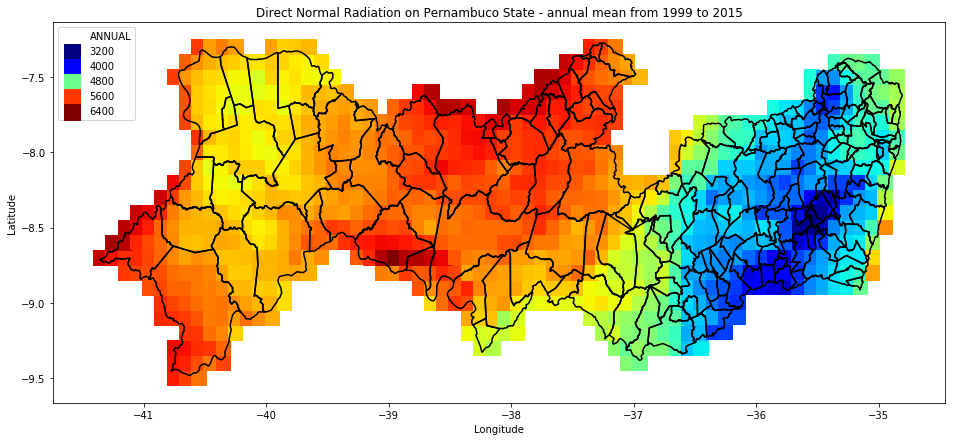

In [24]:
mpl.rcParams["scatter.marker"] = 's'

plt.figure(figsize=(16,7))

for i in range(0,len(PE_map)):
        axis = plt.plot(PE_map[i][0],PE_map[i][1],'k')
                        
sns.scatterplot(data=df_direct_normal,x='LON', y='LAT', hue='ANNUAL',
                palette = 'jet', size="ANNUAL", sizes=(230,250), linewidth=0)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Direct Normal Radiation on Pernambuco State - annual mean from 1999 to 2015')
plt.savefig('figuras/radiacao_direta.png', dpi=300)

## Modelo PVGIS Dados SARAH

Text(0.5, 1.0, 'Average monthly energy production on Pernambuco State - Estimation (KWh)')

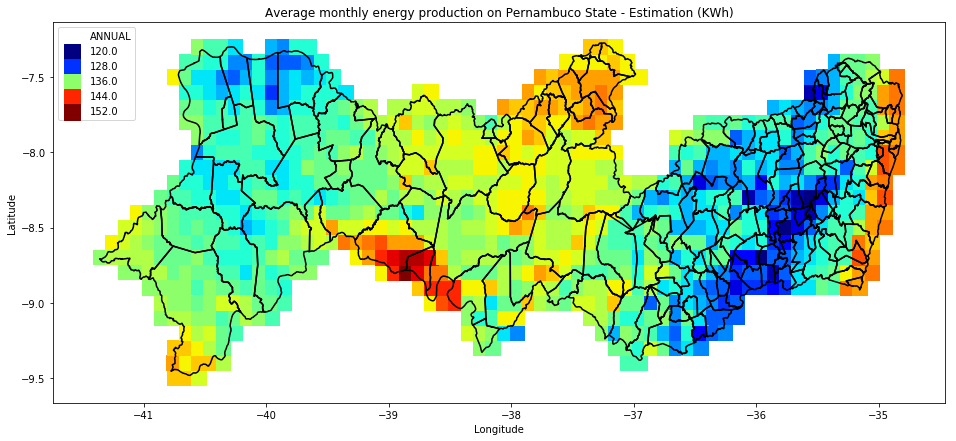

In [25]:
mpl.rcParams["scatter.marker"] = 's'

plt.figure(figsize=(16,7))

for i in range(0,len(PE_map)):
        axis = plt.plot(PE_map[i][0],PE_map[i][1],'k')
                        
sns.scatterplot(data=df_pvgis_sarah_Em,x='LON', y='LAT', hue='ANNUAL',
                palette = 'jet', size="ANNUAL", sizes=(230,250), linewidth=0)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Average monthly energy production on Pernambuco State - Estimation (KWh)')

## Modelo PVGIS Dados NSRDB

Text(0.5, 1.0, 'Average monthly energy production on Pernambuco State - Estimation (KWh)')

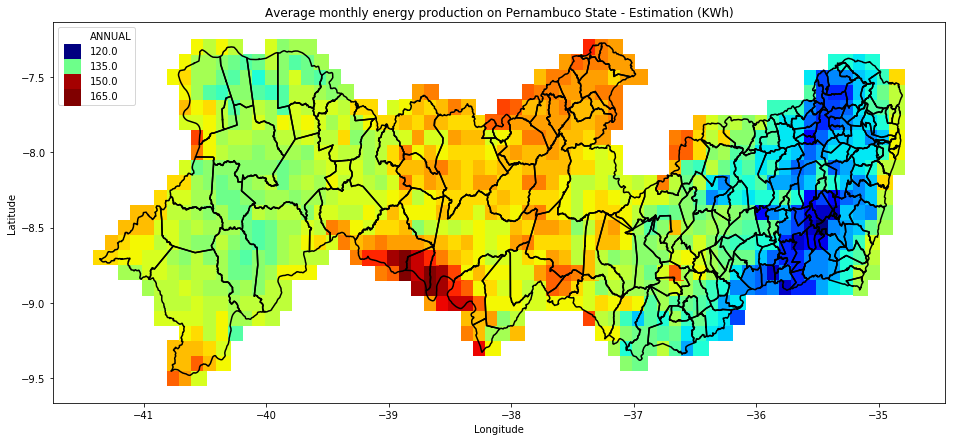

In [26]:
mpl.rcParams["scatter.marker"] = 's'

plt.figure(figsize=(16,7))

for i in range(0,len(PE_map)):
        axis = plt.plot(PE_map[i][0],PE_map[i][1],'k')
                        
sns.scatterplot(data=df_pvgis_nsrdb_Em,x='LON', y='LAT', hue='ANNUAL',
                palette = 'jet', size="ANNUAL", sizes=(230,250), linewidth=0)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Average monthly energy production on Pernambuco State - Estimation (KWh)')

## Precipitação Total

Text(0.5, 1.0, 'Total Precipitation on Pernambuco State - annual mean from 1999 to 2015')

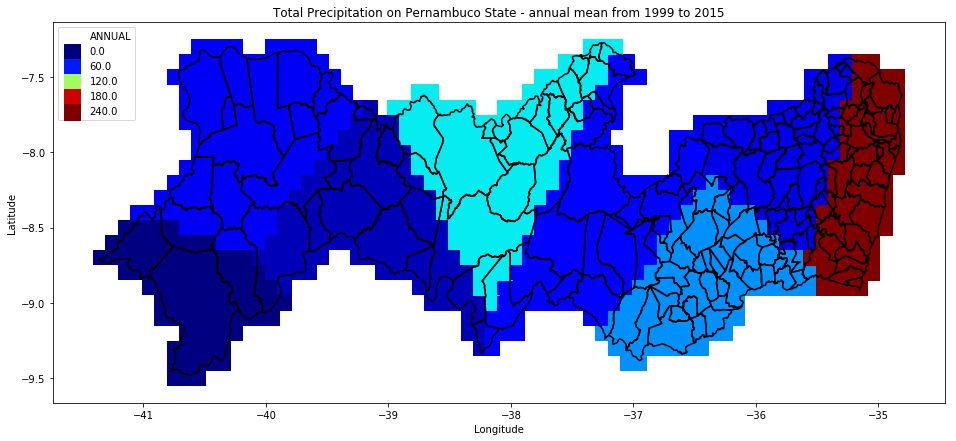

In [27]:
mpl.rcParams["scatter.marker"] = 's'

plt.figure(figsize=(16,7))

for i in range(0,len(PE_map)):
        axis = plt.plot(PE_map[i][0],PE_map[i][1],'k')
                        
sns.scatterplot(data=df_PrecipitacaoTotal,x='LON', y='LAT', hue='ANNUAL',
                palette = 'jet', size="ANNUAL", sizes=(230,250), linewidth=0)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Total Precipitation on Pernambuco State - annual mean from 1999 to 2015')

## Temperatura Maxima Media

Text(0.5, 1.0, 'Maxima Mean Temperature on Pernambuco State - annual mean from 1999 to 2015')

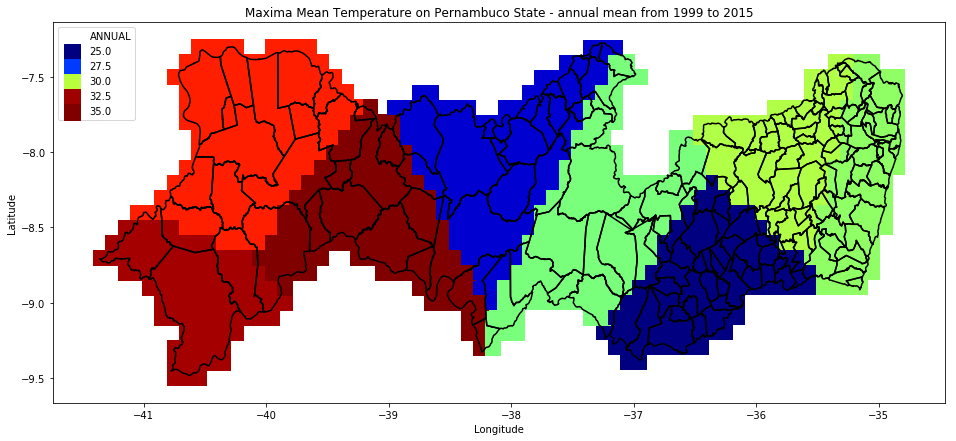

In [28]:
mpl.rcParams["scatter.marker"] = 's'

plt.figure(figsize=(16,7))

for i in range(0,len(PE_map)):
        axis = plt.plot(PE_map[i][0],PE_map[i][1],'k')
                        
sns.scatterplot(data=df_TempMaximaMedia,x='LON', y='LAT', hue='ANNUAL',
                palette = 'jet', size="ANNUAL", sizes=(230,250), linewidth=0)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Maxima Mean Temperature on Pernambuco State - annual mean from 1999 to 2015')

# Modelando

## Vou gerar um modelo não linear da seguinte forma

* Gerar a matriz de correlação (pearson) entre todas as features e a radiação direta.
* Gerar a matriz de covariância entre todas as features e a radiação direta.
* Modificar o sinal das variáveis 
* Componente quadrático: a = cov(feature)
* Componente linear: b = cor(feature)
* Métrica = a\*feature^2 + b\*feature

## Concatenando

In [29]:
data = {'Latitude': df_direct_normal.LAT, 'Longitude':df_direct_normal.LON,'DirectNormal': df_direct_normal.ANNUAL,
        'DifuseRadiation':df_diffuse.ANNUAL, 'FotoActive':df_foto_active.ANNUAL,'GlobalHorizonta':df_global_horizontal.ANNUAL,
        'PlanoInclinado':df_plano_inclinado.ANNUAL,'InsolacaoTotal':df_insolacao_Total.ANNUAL,
        'PreciptacaoTotal':df_PrecipitacaoTotal.ANNUAL, 'TempMaxMedia':df_TempMaximaMedia.ANNUAL,
        'VelocidadeVentoMedia':df_VelocidadeVentoMedia.ANNUAL, 'VelocidadeVentoMaximaMedia':df_VelocidadeVentoMaximaMedia.ANNUAL,
       'Altitude':df_Altitude.ANNUAL,'Umidade':df_UmidadeRelativaMedia.ANNUAL,'TempMinimaMedia':df_TempMinimaMedia.ANNUAL,
       'PressaoMedia':df_PressaoMedia.ANNUAL}

df_all_features = pd.DataFrame(data=data)
df_all_features.to_csv('df_all_features.csv',index=False)

## Dados já salvos

In [30]:
df_all_features = pd.read_csv('df_all_features.csv')

In [31]:
df_all_features.iloc[:,2:] = preprocessing.minmax_scale(df_all_features.iloc[:,2:].values)
df_all_features.head()

Latitude  Longitude  DirectNormal  DifuseRadiation  FotoActive  \
0   -9.5005    -40.749      0.879908         0.275253    0.870408   
1   -9.5005    -40.649      0.840185         0.308081    0.822449   
2   -9.5005    -40.549      0.787529         0.356061    0.774490   
3   -9.4005    -40.749      0.886836         0.272727    0.869388   
4   -9.4005    -40.649      0.872517         0.252525    0.844898   

   GlobalHorizonta  PlanoInclinado  InsolacaoTotal  PreciptacaoTotal  \
0         0.852729        0.829609             1.0               0.0   
1         0.806385        0.787709             1.0               0.0   
2         0.761071        0.729050             1.0               0.0   
3         0.854789        0.837989             1.0               0.0   
4         0.831102        0.818436             1.0               0.0   

   TempMaxMedia  VelocidadeVentoMedia  VelocidadeVentoMaximaMedia  Altitude  \
0      0.965599              0.421058                    0.139189  0.329187   
1      0.965599              0.421058                    0.139189  0.329187   
2      0.965599              0.421058                    0.139189  0.329187   
3      0.965599              0.421058                    0.139189  0.329187   
4      0.965599              0.421058                    0.139189  0.329187   

   Umidade  TempMinimaMedia  PressaoMedia  
0      0.0              1.0      0.635759  
1      0.0              1.0      0.635759  
2      0.0              1.0      0.635759  
3      0.0              1.0      0.635759  
4      0.0              1.0      0.635759

In [ ]:
correlation_matrix = df_all_features.iloc[:,2:].corr()
fig = plt.figure(figsize=(16,16), dpi=300)
sns.set(font_scale = 2)
plt.title('Features Correlation Matrix')
sns.heatmap(correlation_matrix, cmap='jet', yticklabels=df_all_features.iloc[:,2:].columns,
            xticklabels=df_all_features.iloc[:,2:].columns, annot = True, annot_kws = {'fontsize': 20})

#plt.savefig('figuras\correlation_nopvgis.pdf', dpi=300)

In [33]:
covariance_matrix = df_all_features.iloc[:,2:].cov()
covariance_matrix = preprocessing.minmax_scale(covariance_matrix)
fig = plt.figure(figsize=(16,10), dpi=450)

sns.set(font_scale = 4)
plt.title('Features Covariance Matrix')
sns.heatmap(covariance_matrix, cmap='jet', yticklabels=df_all_features.iloc[:,2:].columns,
            xticklabels=df_all_features.iloc[:,2:].columns, annot = True, annot_kws = {'fontsize': 20})

#plt.savefig('figuras/covariance_nopvgis.png', dpi=300)

In [34]:
df_all_features['Metrica_Proposta'] = df_all_features['DirectNormal']
df_all_features.head()

Latitude  Longitude  DirectNormal  DifuseRadiation  FotoActive  \
0   -9.5005    -40.749      0.879908         0.275253    0.870408   
1   -9.5005    -40.649      0.840185         0.308081    0.822449   
2   -9.5005    -40.549      0.787529         0.356061    0.774490   
3   -9.4005    -40.749      0.886836         0.272727    0.869388   
4   -9.4005    -40.649      0.872517         0.252525    0.844898   

   GlobalHorizonta  PlanoInclinado  InsolacaoTotal  PreciptacaoTotal  \
0         0.852729        0.829609             1.0               0.0   
1         0.806385        0.787709             1.0               0.0   
2         0.761071        0.729050             1.0               0.0   
3         0.854789        0.837989             1.0               0.0   
4         0.831102        0.818436             1.0               0.0   

   TempMaxMedia  VelocidadeVentoMedia  VelocidadeVentoMaximaMedia  Altitude  \
0      0.965599              0.421058                    0.139189  0.329187   
1      0.965599              0.421058                    0.139189  0.329187   
2      0.965599              0.421058                    0.139189  0.329187   
3      0.965599              0.421058                    0.139189  0.329187   
4      0.965599              0.421058                    0.139189  0.329187   

   Umidade  TempMinimaMedia  PressaoMedia  Metrica_Proposta  
0      0.0              1.0      0.635759          0.879908  
1      0.0              1.0      0.635759          0.840185  
2      0.0              1.0      0.635759          0.787529  
3      0.0              1.0      0.635759          0.886836  
4      0.0              1.0      0.635759          0.872517

In [35]:
corelation_vector = correlation_matrix.iloc[0,:].values
covariance_vector = covariance_matrix[0,:]
###----------- alterando o sinal da correlação para:
corelation_vector[6] = -corelation_vector[6] # Precipitação Total
corelation_vector[7] = -corelation_vector[7] # TempMaxMedia
corelation_vector[11] = -corelation_vector[11] # Umidade
###------------
for i in range(0,len(df_all_features)):
    df_all_features.iloc[i,-1] = np.dot(covariance_vector, df_all_features.iloc[i,2:-1]**2) + np.dot(corelation_vector, df_all_features.iloc[i,2:-1]) 

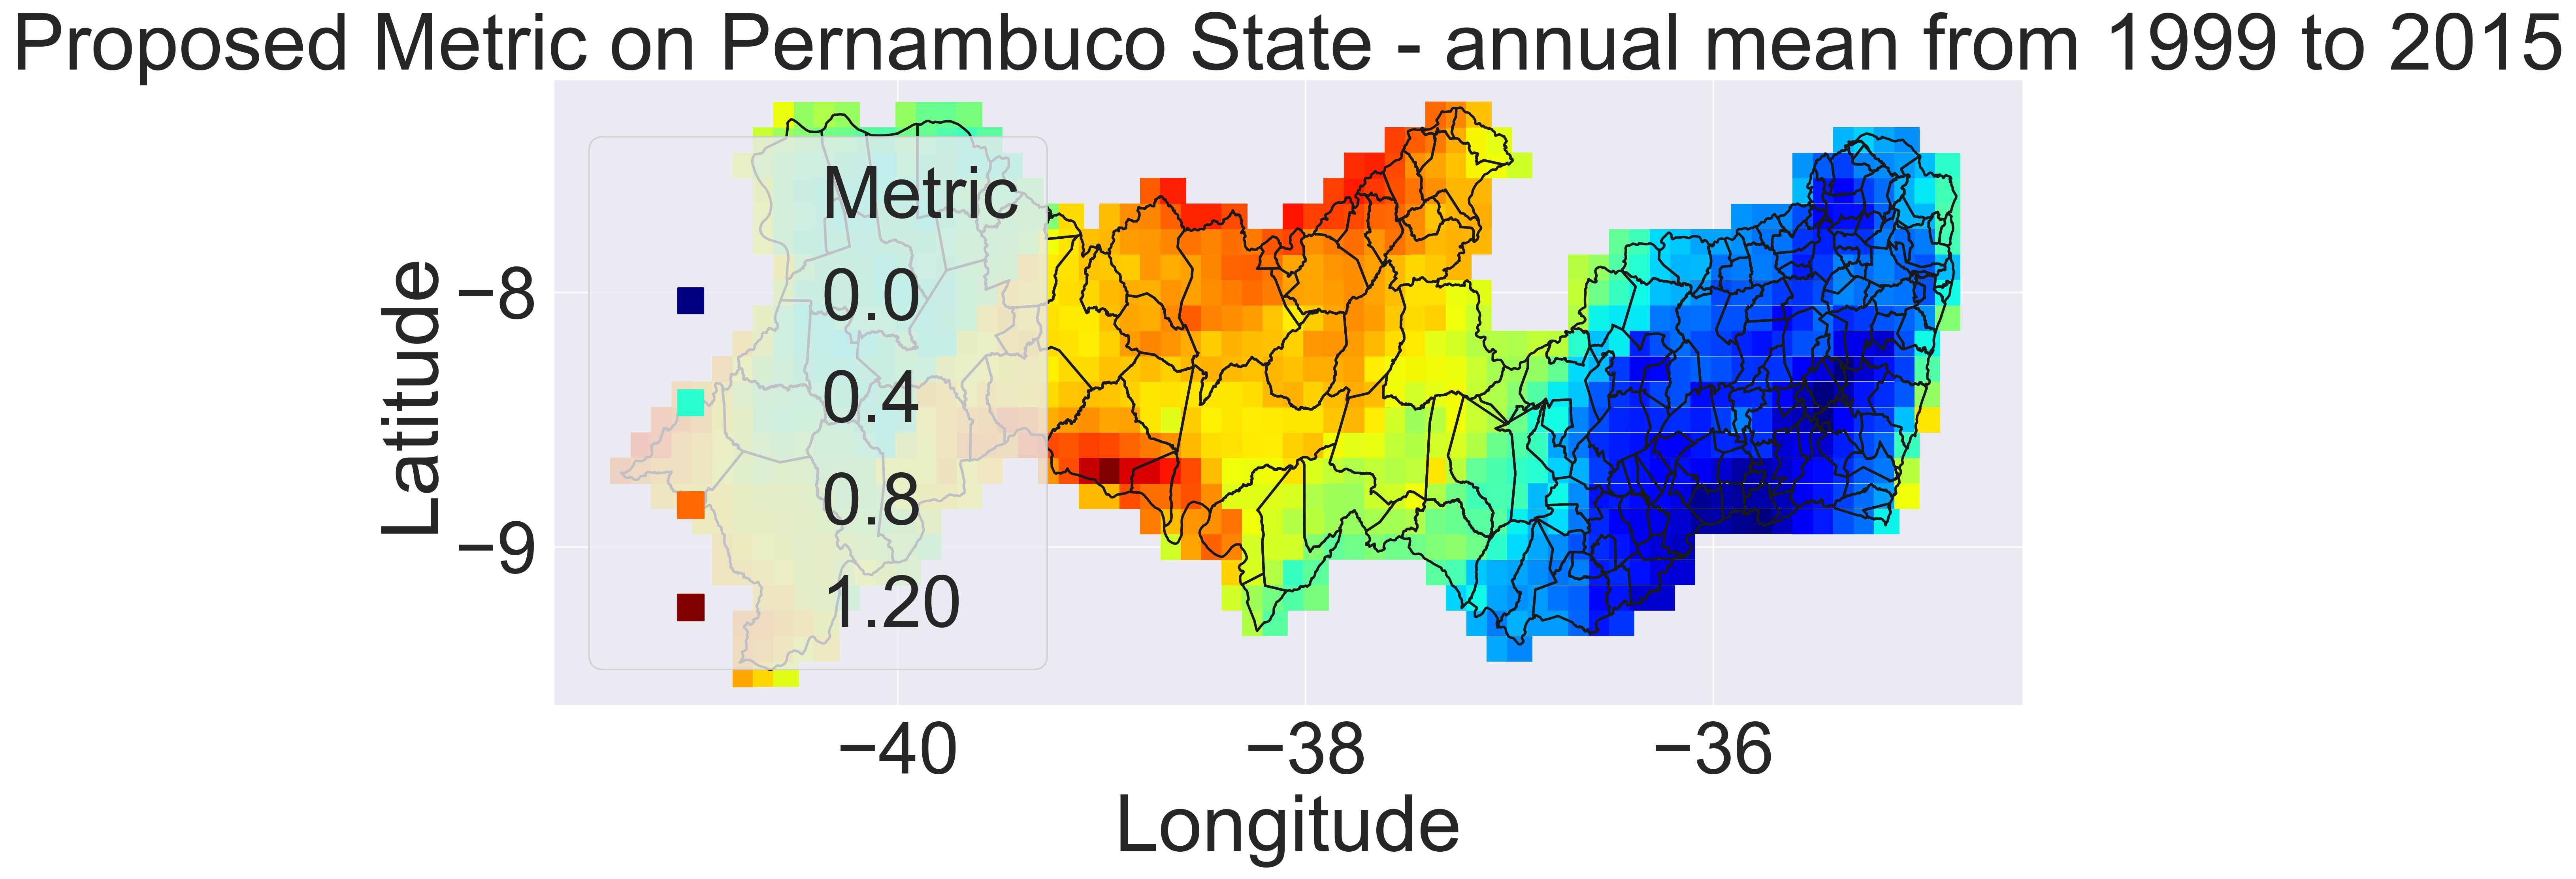

In [36]:
df_all_features.iloc[:,-1] = preprocessing.minmax_scale(df_all_features.iloc[:,-1].values)

mpl.rcParams["scatter.marker"] = 's'

plt.figure(figsize=(16,7), dpi=300)

for i in range(0,len(PE_map)):
        axis = plt.plot(PE_map[i][0],PE_map[i][1],'k')
                        
plot = sns.scatterplot(data=df_all_features,x='Longitude', y='Latitude', hue='Metrica_Proposta',
                palette = 'jet', size="Metrica_Proposta", sizes=(230,250), linewidth=0)

leg = plot.legend_
for t in leg.texts[1:]:
    # truncate label text to 4 characters
    t.set_text(t.get_text()[:4])

leg.texts[0].set_text('Metric')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Proposed Metric on Pernambuco State - annual mean from 1999 to 2015')

plt.savefig('figuras/metrica_proposta.png', dpi=300)

## Comparar métrica CovCor com SARAH e NSRDB e Apenas Radiação Direta

In [37]:
print('Metrica Proposta')
print('Em - NSRDB MAE:',
      mae(preprocessing.minmax_scale(df_pvgis_nsrdb_Em.ANNUAL), df_all_features.Metrica_Proposta))
print('Em - NSRDB MSE:',
      mse(preprocessing.minmax_scale(df_pvgis_nsrdb_Em.ANNUAL), df_all_features.Metrica_Proposta))
print('Em - SARAH MAE:',
      mae(preprocessing.minmax_scale(df_pvgis_sarah_Em.ANNUAL), df_all_features.Metrica_Proposta))
print('Em - SARAH MSE:',
      mse(preprocessing.minmax_scale(df_pvgis_sarah_Em.ANNUAL), df_all_features.Metrica_Proposta))

print('Direct Normal')
print('Em - NSRDB MAE:',
      mae(preprocessing.minmax_scale(df_pvgis_nsrdb_Em.ANNUAL), df_all_features.DirectNormal))
print('Em - NSRDB MSE:',
      mse(preprocessing.minmax_scale(df_pvgis_nsrdb_Em.ANNUAL), df_all_features.DirectNormal))
print('Em - SARAH MAE:',
      mae(preprocessing.minmax_scale(df_pvgis_sarah_Em.ANNUAL), df_all_features.DirectNormal))
print('Em - SARAH MSE',
      mse(preprocessing.minmax_scale(df_pvgis_sarah_Em.ANNUAL), df_all_features.DirectNormal))

Metrica Proposta
Em - NSRDB MAE: 0.10576633456188002
Em - NSRDB MSE: 0.019386795992484544
Em - SARAH MAE: 0.131027397822414
Em - SARAH MSE: 0.026333572467514985
Direct Normal
Em - NSRDB MAE: 0.12470865628436249
Em - NSRDB MSE: 0.020302053463229608
Em - SARAH MAE: 0.19929756635574614
Em - SARAH MSE 0.0515312753379681


Text(0.5, 1.0, 'Estimated Energy Production - Absolute Error - Proposed Metric NSRDB')

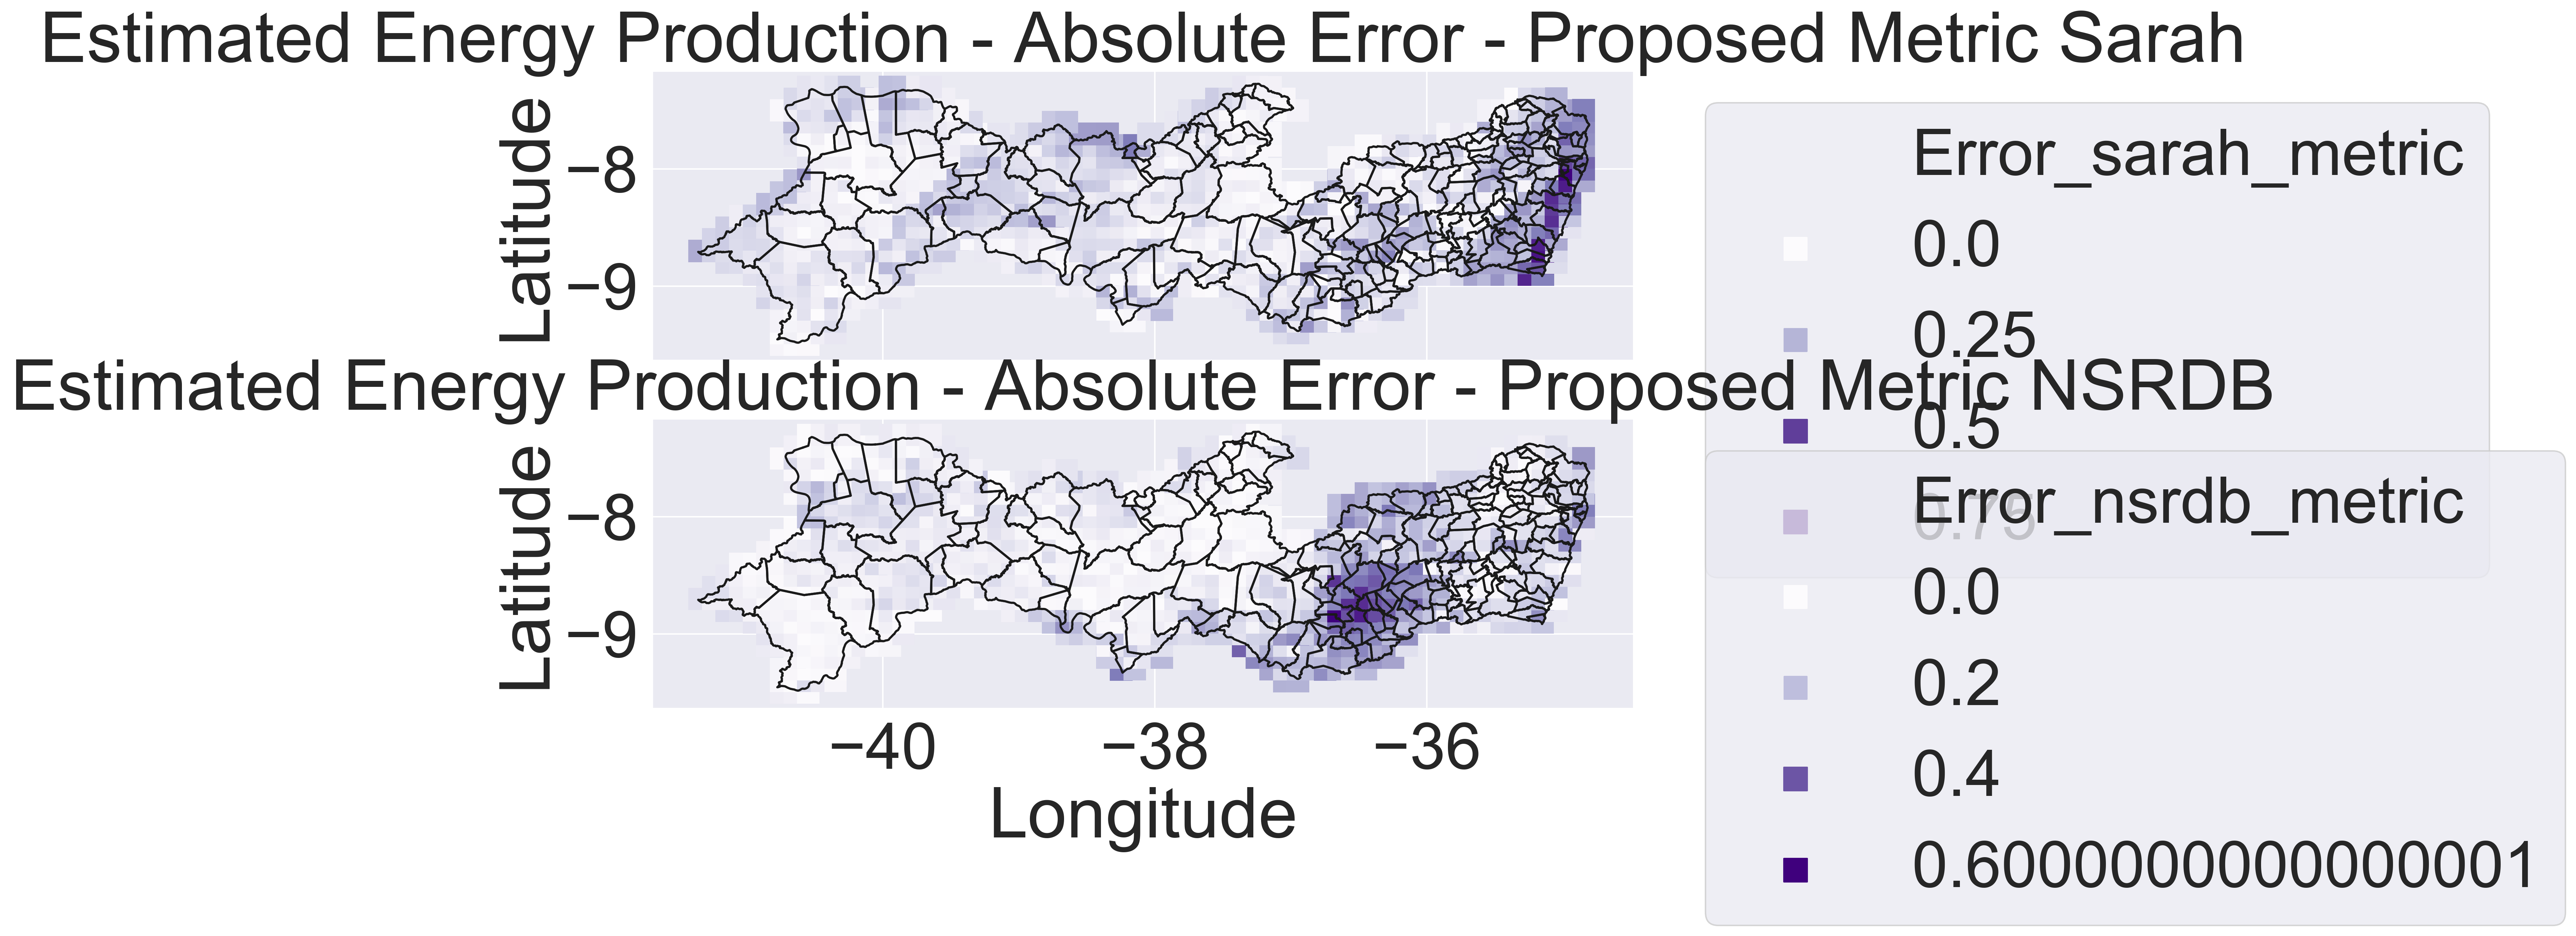

In [38]:
df_error_cov_cor = df_all_features.loc[:,['Latitude','Longitude']]
df_error_cov_cor['Error_sarah_metric'] = abs(preprocessing.minmax_scale(df_pvgis_sarah_Em.ANNUAL) - df_all_features.Metrica_Proposta)
df_error_cov_cor['Error_nsrdb_metric'] = abs(preprocessing.minmax_scale(df_pvgis_nsrdb_Em.ANNUAL) - df_all_features.Metrica_Proposta)

mpl.rcParams["scatter.marker"] = 's'

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True, dpi=300)

for i in range(0,len(PE_map)):
        ax1.plot(PE_map[i][0],PE_map[i][1],'k')

sns.scatterplot(data=df_error_cov_cor, x='Longitude', y='Latitude', hue='Error_sarah_metric',
                palette = 'Purples', size='Error_sarah_metric', sizes=(230,250), linewidth=0, ax=ax1)

ax1.legend(bbox_to_anchor=(1.04,1), loc="upper left")
ax1.set_xlabel('Longitude')
ax1.set_title('Estimated Energy Production - Absolute Error - Proposed Metric Sarah')

for i in range(0,len(PE_map)):
        ax2.plot(PE_map[i][0],PE_map[i][1],'k')
                        
sns.scatterplot(data=df_error_cov_cor, x='Longitude', y='Latitude', hue='Error_nsrdb_metric',
                palette = 'Purples', size='Error_nsrdb_metric', sizes=(230,250), linewidth=0, ax=ax2)

ax2.legend(bbox_to_anchor=(1.04,1), loc="upper left")
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
ax2.set_title('Estimated Energy Production - Absolute Error - Proposed Metric NSRDB')

# Adicionando PVGIS

In [39]:
df_all_features_pvgis = pd.read_csv('df_all_features.csv')

df_all_features_pvgis['Em_SARAH'] = df_pvgis_sarah_Em.ANNUAL
df_all_features_pvgis['Hm_SARAH'] = df_pvgis_sarah_Hm.ANNUAL
df_all_features_pvgis['SDm_SARAH'] = df_pvgis_sarah_SDm.ANNUAL
df_all_features_pvgis['Em_NSRDB'] = df_pvgis_nsrdb_Em.ANNUAL
df_all_features_pvgis['Hm_NSRDB'] = df_pvgis_nsrdb_Hm.ANNUAL
df_all_features_pvgis['SDm_NSRDM'] = df_pvgis_nsrdb_SDm.ANNUAL

In [40]:
df_all_features_pvgis.to_csv('df_all_features_pvgis.csv',index=False)
df_all_features_pvgis.head()

Latitude  Longitude  DirectNormal  DifuseRadiation  FotoActive  \
0   -9.5005    -40.749          5668             2047        5834   
1   -9.5005    -40.649          5582             2060        5787   
2   -9.5005    -40.549          5468             2079        5740   
3   -9.4005    -40.749          5683             2046        5833   
4   -9.4005    -40.649          5652             2038        5809   

   GlobalHorizonta  PlanoInclinado  InsolacaoTotal  PreciptacaoTotal  \
0             5811            2454      256.416749         36.440196   
1             5766            2439      256.416749         36.440196   
2             5722            2418      256.416749         36.440196   
3             5813            2457      256.416749         36.440196   
4             5790            2450      256.416749         36.440196   

   TempMaxMedia  ...  Altitude    Umidade  TempMinimaMedia  PressaoMedia  \
0     32.475011  ...    370.46  55.461397        22.395253    970.878576   
1     32.475011  ...    370.46  55.461397        22.395253    970.878576   
2     32.475011  ...    370.46  55.461397        22.395253    970.878576   
3     32.475011  ...    370.46  55.461397        22.395253    970.878576   
4     32.475011  ...    370.46  55.461397        22.395253    970.878576   

   Em_SARAH  Hm_SARAH  SDm_SARAH  Em_NSRDB  Hm_NSRDB  SDm_NSRDM  
0     140.0       184       4.07     145.0       191       3.02  
1     140.0       184       3.98     143.0       188       2.89  
2     138.0       182       4.31     139.0       184       2.86  
3     141.0       186       3.85     142.0       187       2.60  
4     139.0       184       4.09     142.0       188       2.97  

[5 rows x 22 columns]

## Só para visualizar mesmo

In [41]:
df_all_features['Em_SARAH'] = preprocessing.minmax_scale(df_pvgis_sarah_Em.ANNUAL)
df_all_features['Em_NSRDB'] = preprocessing.minmax_scale(df_pvgis_nsrdb_Em.ANNUAL)
df_all_features.head()

Latitude  Longitude  DirectNormal  DifuseRadiation  FotoActive  \
0   -9.5005    -40.749      0.879908         0.275253    0.870408   
1   -9.5005    -40.649      0.840185         0.308081    0.822449   
2   -9.5005    -40.549      0.787529         0.356061    0.774490   
3   -9.4005    -40.749      0.886836         0.272727    0.869388   
4   -9.4005    -40.649      0.872517         0.252525    0.844898   

   GlobalHorizonta  PlanoInclinado  InsolacaoTotal  PreciptacaoTotal  \
0         0.852729        0.829609             1.0               0.0   
1         0.806385        0.787709             1.0               0.0   
2         0.761071        0.729050             1.0               0.0   
3         0.854789        0.837989             1.0               0.0   
4         0.831102        0.818436             1.0               0.0   

   TempMaxMedia  VelocidadeVentoMedia  VelocidadeVentoMaximaMedia  Altitude  \
0      0.965599              0.421058                    0.139189  0.329187   
1      0.965599              0.421058                    0.139189  0.329187   
2      0.965599              0.421058                    0.139189  0.329187   
3      0.965599              0.421058                    0.139189  0.329187   
4      0.965599              0.421058                    0.139189  0.329187   

   Umidade  TempMinimaMedia  PressaoMedia  Metrica_Proposta  Em_SARAH  \
0      0.0              1.0      0.635759          0.733158  0.695652   
1      0.0              1.0      0.635759          0.682466  0.695652   
2      0.0              1.0      0.635759          0.624578  0.608696   
3      0.0              1.0      0.635759          0.737873  0.739130   
4      0.0              1.0      0.635759          0.717486  0.652174   

   Em_NSRDB  
0  0.806452  
1  0.741935  
2  0.612903  
3  0.709677  
4  0.709677

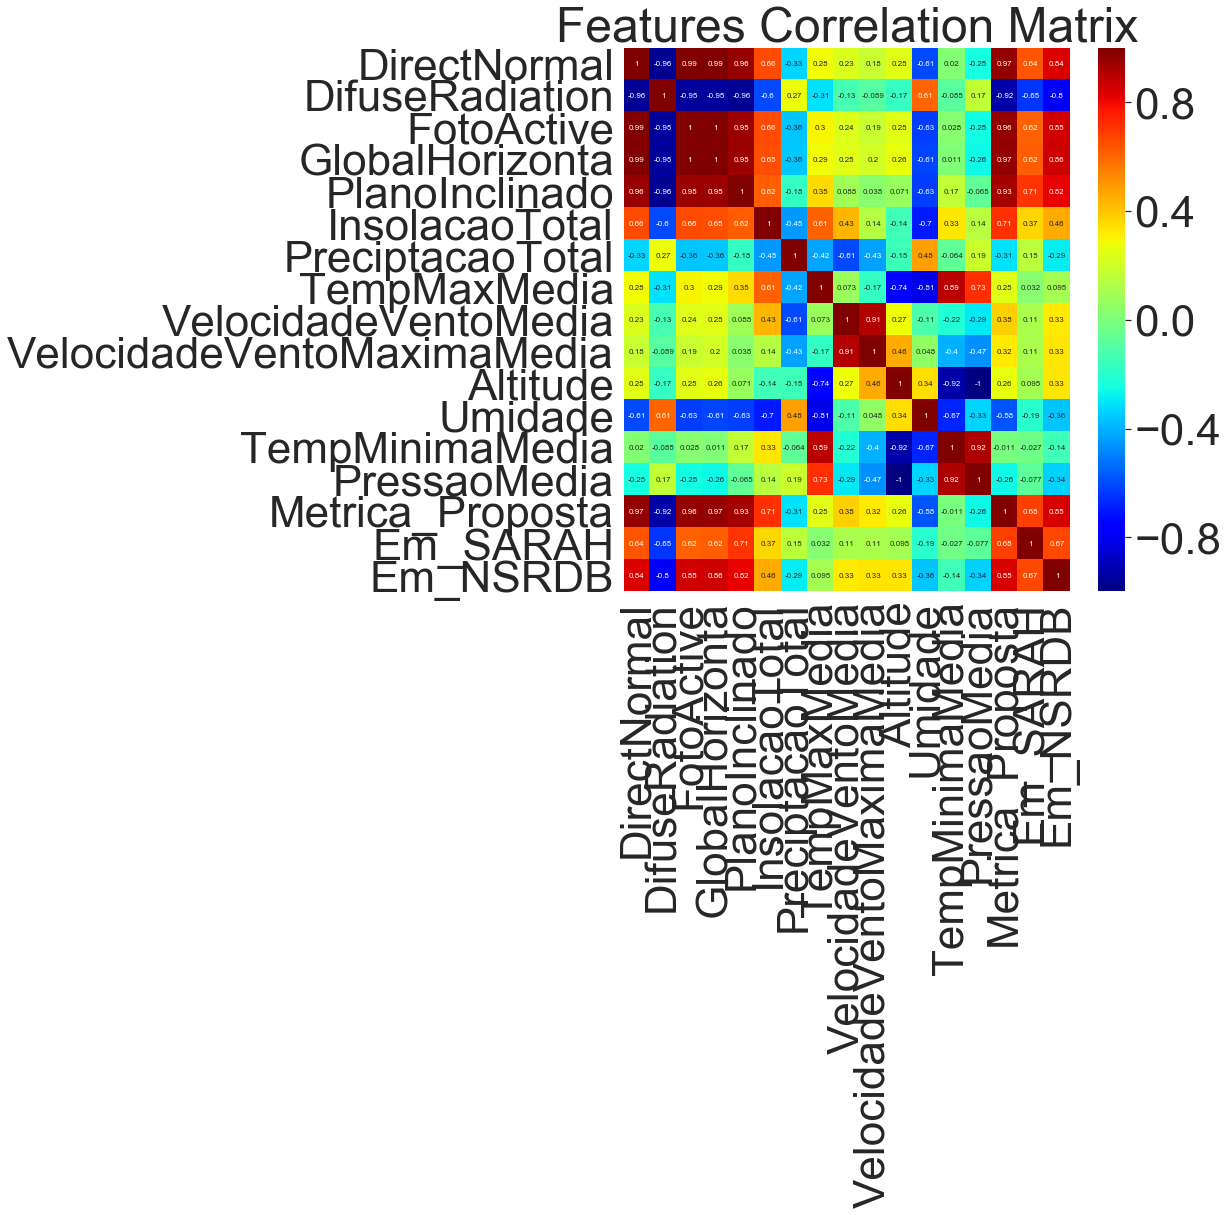

In [42]:
fig = plt.figure(figsize=(10,10))
plt.title('Features Correlation Matrix')
correlation_matrix = df_all_features.iloc[:,2:].corr()
sns.heatmap(correlation_matrix, cmap='jet', yticklabels=df_all_features.iloc[:,2:].columns,
            xticklabels=df_all_features.iloc[:,2:].columns, annot = True, annot_kws = {'fontsize': 8})

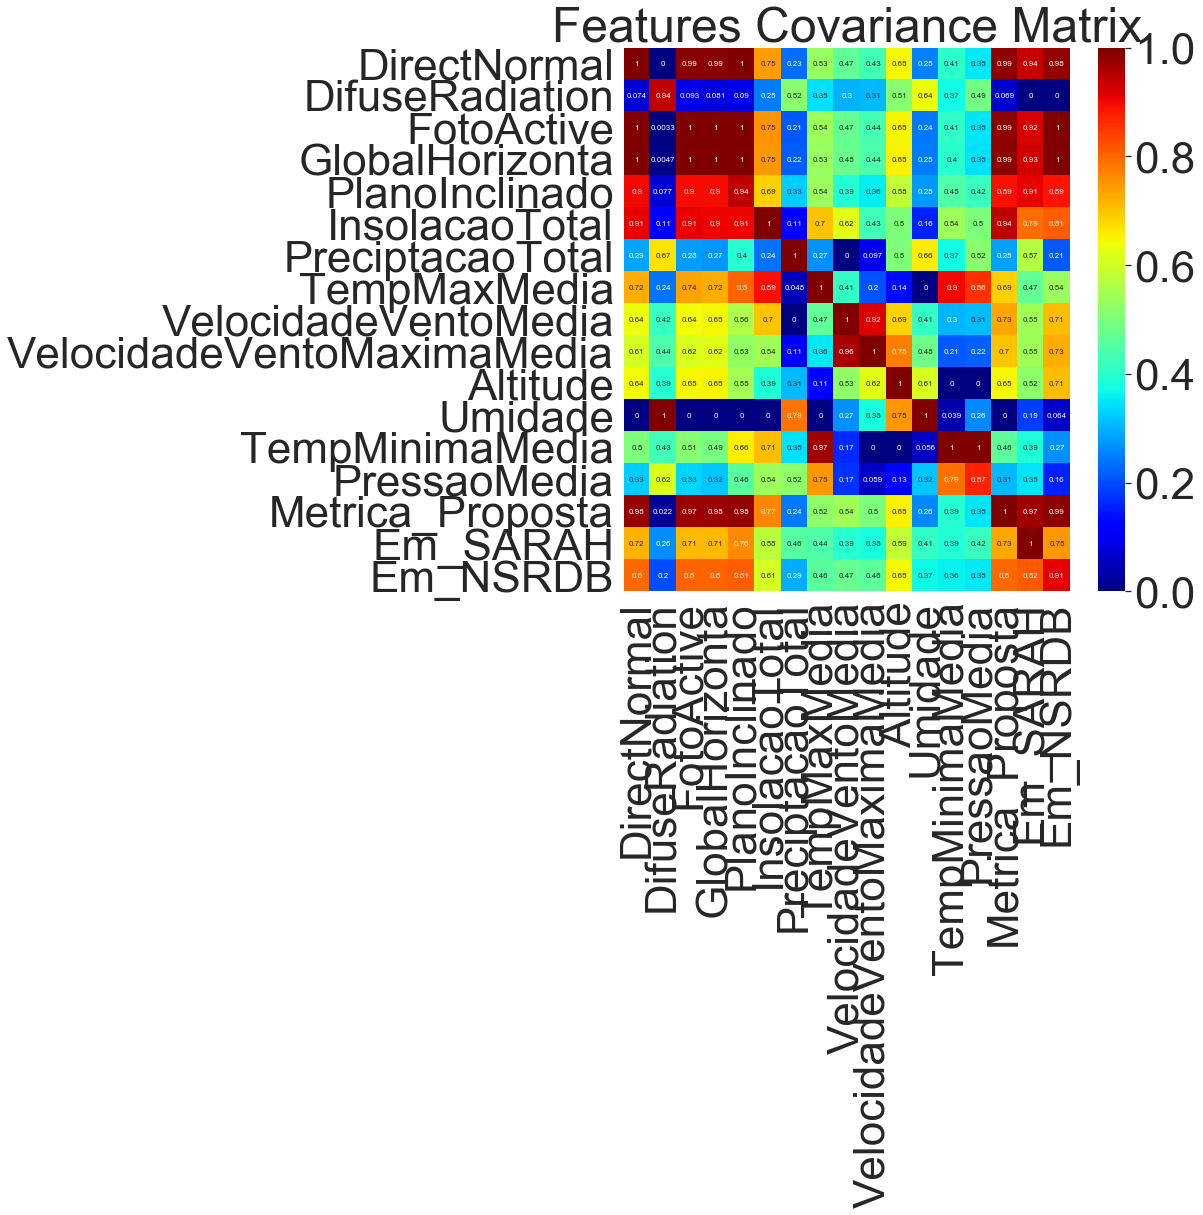

In [43]:
covariance_matrix = df_all_features.iloc[:,2:].cov()
covariance_matrix = preprocessing.minmax_scale(covariance_matrix)
fig = plt.figure(figsize=(10,10))
plt.title('Features Covariance Matrix')
sns.heatmap(covariance_matrix, cmap='jet', yticklabels=df_all_features.iloc[:,2:].columns,
            xticklabels=df_all_features.iloc[:,2:].columns, annot = True, annot_kws = {'fontsize': 8})